In [10]:
pip install seaborn pandas IPython Pyarrow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.8 MB 217.9 kB/s eta 0:01:59
   ---------------------------------------- 0.1/25.8 MB 435.7 kB/s eta 0:01:00
   ---------------------------------------- 0.2/25.8 MB 1.4 MB/s eta 0:00:19
    --------------------------------------- 0.5/25.8 MB 2.4 MB/s eta 0:00:11
   - -------------------------------------- 0.8/25.8 MB 3.3 MB/s eta 0:00:08
   -- ------------------------------------- 1.4/25.8 MB 4.7 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/25.8 MB 5.5 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/25.8 MB 6.0 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/25.8 MB 6.7 MB/s eta 0:00:04
   ----- ---------------------------------- 3.4/25.8 MB 7.0 MB/s eta 0:00:04
   -----

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score
from IPython.display import Audio

In [5]:
data = "E:\\SEM4\\DSP proj\\serdataset\\ravdess_data\\"

In [6]:
ravdessdirlist = os.listdir(data)
emotion = []
path =[]
for dir in ravdessdirlist:
    actor = os.listdir(data + dir)
    for file in actor:
        part = file.split('.')[0]
        part = file.split('-')
        emotion.append(int(part[2]))
        path.append(data + dir + '/' + file)
dfemotion = pd.DataFrame(emotion, columns = ['Emotions'])
dfpath = pd.DataFrame(path, columns = ['Path'])
ravdessdf = pd.concat([dfemotion, dfpath], axis = 1)

In [7]:
ravdessdf.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace = True)
ravdessdf.head()

,Emotions,Path
0,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
1,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
2,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
3,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
4,calm,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...


In [8]:
datapath = pd.concat([ravdessdf], axis = 0)
datapath.to_csv("data_path.csv", index = False)
datapath.head()

,Emotions,Path
0,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
1,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
2,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
3,neutral,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...
4,calm,E:\SEM4\DSP proj\serdataset\ravdess_data\Actor...


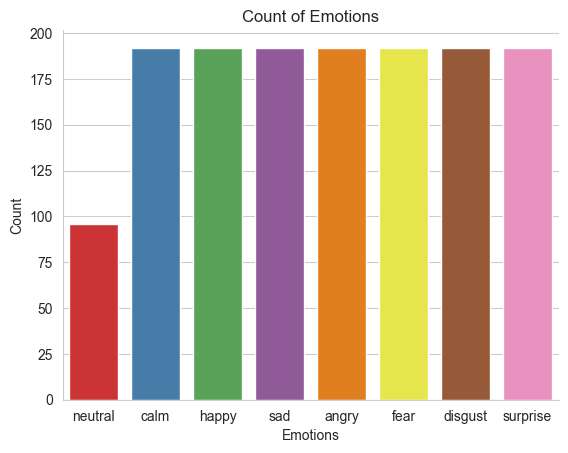

In [9]:
plt.title('Count of Emotions')
sns.countplot(x=datapath.Emotions, palette='Set1')
plt.xlabel('Emotions')
plt.ylabel('Count')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [113]:
pip install --upgrade matplotlib librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
def wp(data, sr, e):
    plt.figure(figsize = (10,3))
    plt.title('Waveplot for audio with {} emotion'.format(e))
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [11]:
def sg(data, sr, e):
    xft = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(xft))
    plt.figure(figsize = (12,3))
    plt.title('Spectrogram for audio with {} emotion'.format(e))
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

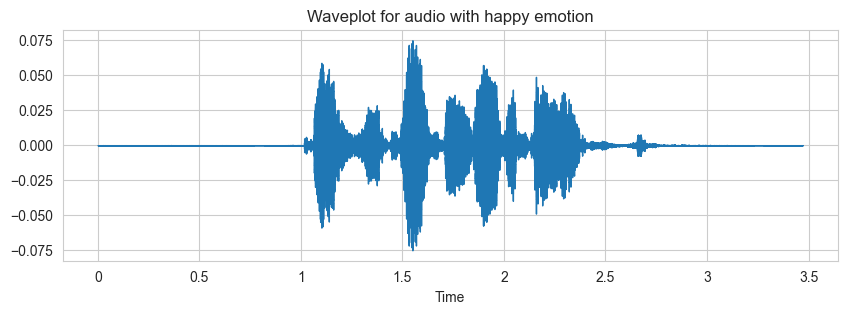

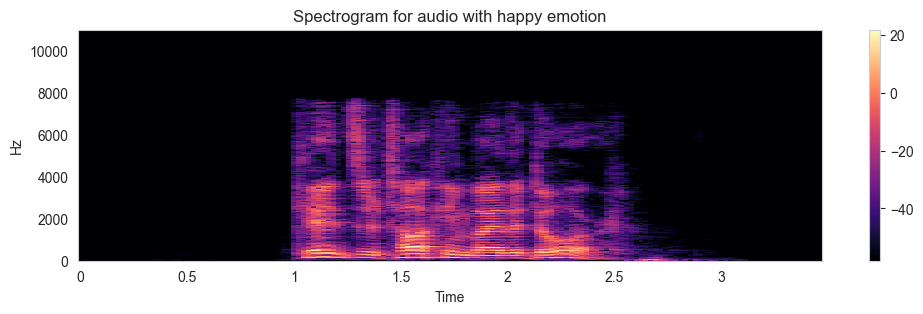

In [12]:
emotion = 'happy'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sr = librosa.load(path)
wp(data, sr, emotion)
sg(data, sr, emotion)
Audio(path)

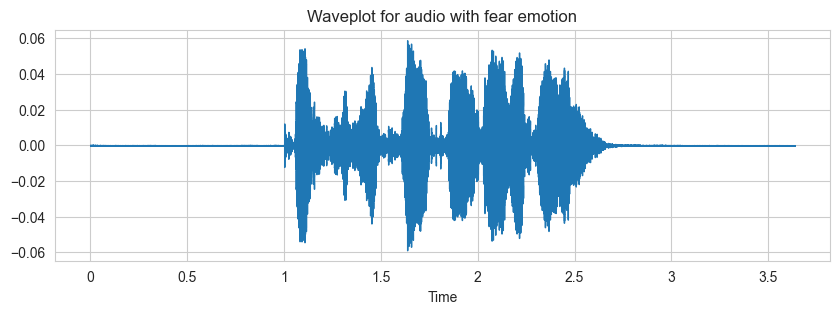

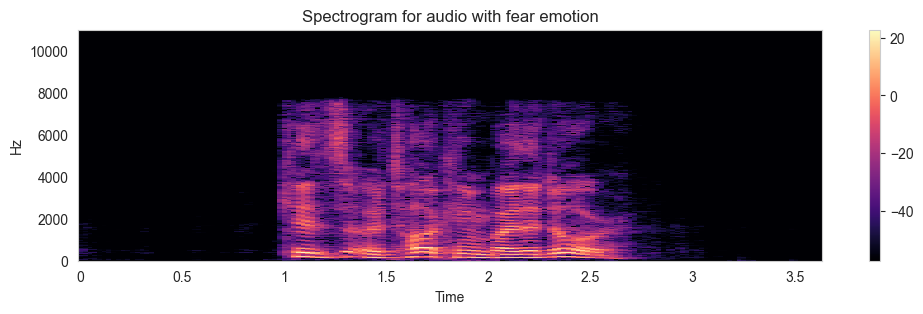

In [13]:
emotion = 'fear'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sr = librosa.load(path)
wp(data, sr, emotion)
sg(data, sr, emotion)
Audio(path)

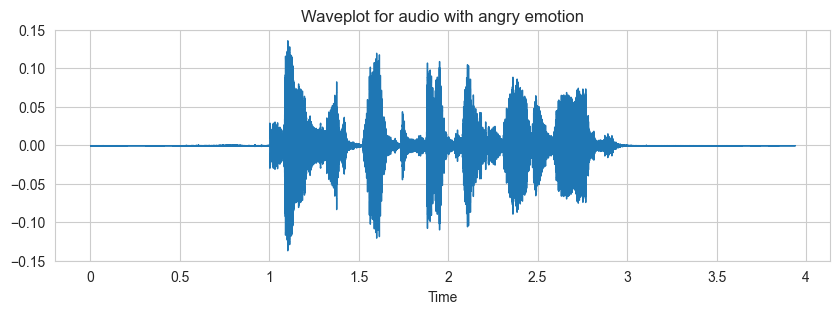

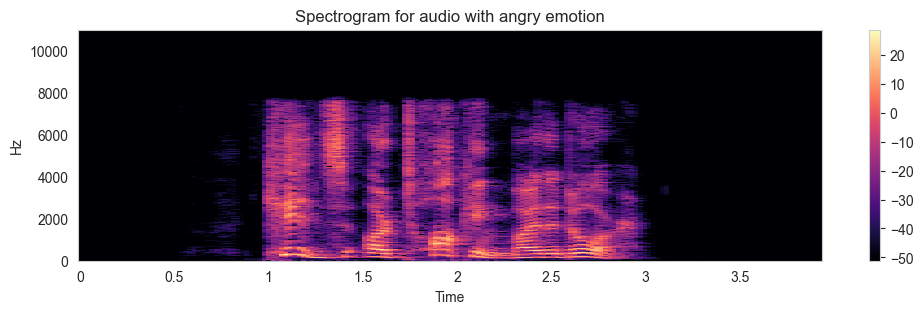

In [14]:
emotion = 'angry'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sr = librosa.load(path)
wp(data, sr, emotion)
sg(data, sr, emotion)
Audio(path)

In [15]:
def noise(data):
    noiseamp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noiseamp*np.random.normal(size = data.shape[0])
    return data

def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = 0.8)

def shift(data):
    shiftrange = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, shiftrange)

def pitch(data, sr, n_steps = 0.7):
    return librosa.effects.pitch_shift(data, sr = sr, n_steps=0.7)

In [16]:
path = np.array(datapath.Path)[1]
data, sr = librosa.load(path)

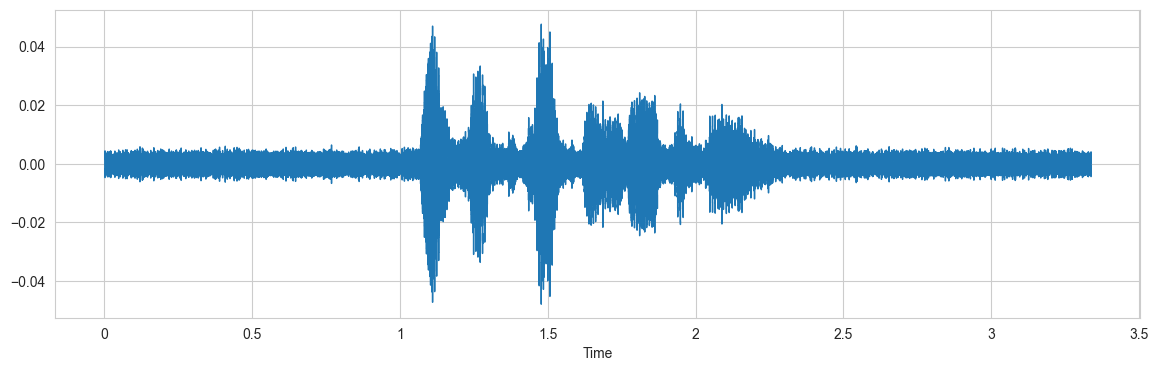

In [17]:
xn = noise(data)
plt.figure(figsize =(14,4))
librosa.display.waveshow(y=xn, sr = sr)
Audio(xn, rate = sr)

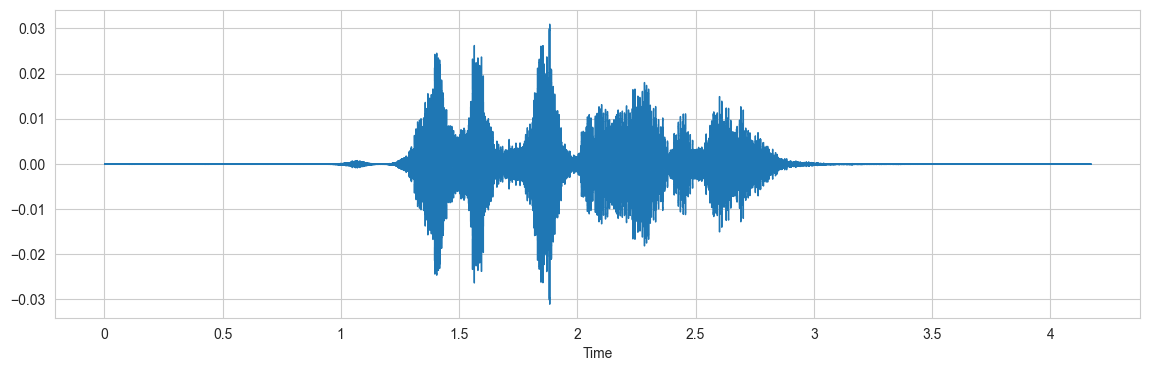

In [18]:
xs = stretch(data)
plt.figure(figsize =(14,4))
librosa.display.waveshow(y=xs, sr = sr)
Audio(xs, rate = sr)

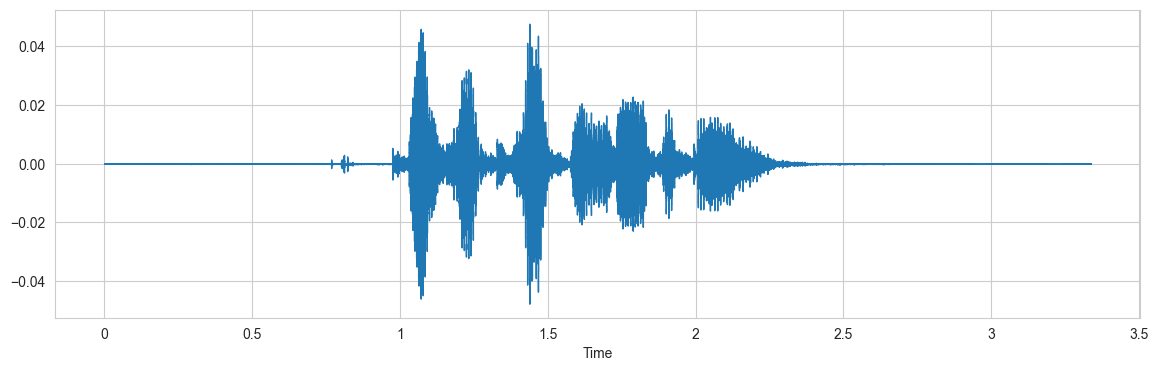

In [19]:
xsh = shift(data)
plt.figure(figsize =(14,4))
librosa.display.waveshow(y=xsh, sr = sr)
Audio(xsh, rate = sr)

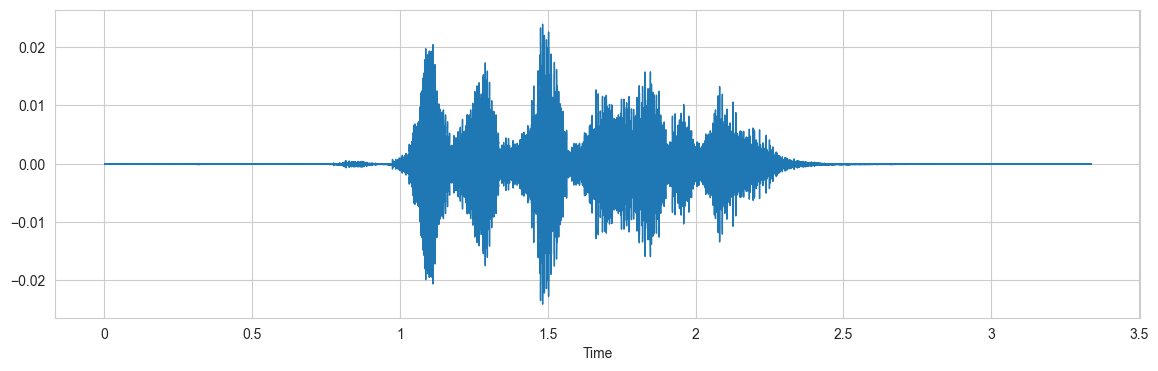

In [20]:
xp = pitch(data, sr)
plt.figure(figsize =(14,4))
librosa.display.waveshow(y=xp, sr = sr)
Audio(xp, rate = sr)

In [21]:
def ef(filename, mfcc, chroma, mel):
    with soundfile.SoundFile(filename) as soundFile:
        X = soundFile.read(dtype = "float32")
        SR = soundFile.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        res = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y = X, sr = SR, n_mfcc = 40).T, axis = 0)
            res = np.hstack((res, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S = stft, sr = SR).T, axis = 0)
            res = np.hstack((res, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y = X, sr = SR).T, axis = 0)
            res = np.hstack((res, mel))
        return res


In [22]:
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}
obem = ['calm', 'happy', 'fearful', 'disgust']

In [23]:
def loaddata(ts = 0.1):
    x, y = [], []
    for file in glob.glob("E:\\SEM4\\DSP proj\\serdataset\\ravdess_data\\Actor_*\\*.wav"):
        filename = os.path.basename(file)
        emotion1 = emotions[filename.split("-")[2]]
        if emotion1 not in obem:
            continue
        feature = ef(file, mfcc = True, chroma = True, mel = True)
        x.append(feature)
        y.append(emotion1)
    return tts(np.array(x), y, test_size = ts, random_state = 42)

In [24]:
xtrn, xtst, ytrn, ytst = loaddata(ts = 0.1)

In [25]:
print((xtrn.shape[0], xtst.shape[0]))

(691, 77)


In [26]:
print(f'Features extracted = {xtrn.shape[1]}')

Features extracted = 180


In [27]:
model1 = mlp(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter =500)

In [28]:
model1.fit(xtrn, ytrn)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [29]:
expofy = ytst
ypred = model1.predict(xtst)

In [30]:
confmat = metrics.confusion_matrix(expofy, ypred)
print(confmat)

[[17  2  0  0]
 [ 2 15  0  1]
 [ 0  3 15  3]
 [ 1  3  5 10]]


In [31]:
clasrep = classification_report(ytst, ypred)
print(clasrep)

              precision    recall  f1-score   support

        calm       0.85      0.89      0.87        19
     disgust       0.65      0.83      0.73        18
     fearful       0.75      0.71      0.73        21
       happy       0.71      0.53      0.61        19

    accuracy                           0.74        77
   macro avg       0.74      0.74      0.74        77
weighted avg       0.74      0.74      0.74        77



In [32]:
acc = accuracy_score(y_true = ytst, y_pred = ypred)
print("Accuracy from MLPClassifier is {:.2f}%".format(acc * 100))

Accuracy from MLPClassifier is 74.03%


<Axes: >

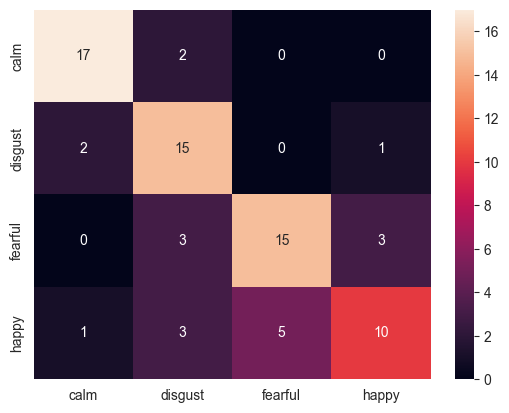

In [33]:
sns.heatmap(confmat, annot=True, 
          xticklabels = ["calm", "disgust", "fearful", "happy"], 
         yticklabels=["calm", "disgust", "fearful", "happy"])

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrn, ytrn)
ypred_knn = knn.predict(xtst)
confmat_knn = metrics.confusion_matrix(expofy, ypred_knn)
print(confmat_knn)
clasrep_knn = classification_report(ytst, ypred_knn)

[[18  0  0  1]
 [ 3 10  2  3]
 [ 3  3 12  3]
 [ 2  0  7 10]]


In [35]:
print(clasrep_knn)
acc_knn = accuracy_score(y_true = ytst, y_pred = ypred_knn)
print("Accuracy from KNN is {:.2f}%".format(acc_knn * 100))

              precision    recall  f1-score   support

        calm       0.69      0.95      0.80        19
     disgust       0.77      0.56      0.65        18
     fearful       0.57      0.57      0.57        21
       happy       0.59      0.53      0.56        19

    accuracy                           0.65        77
   macro avg       0.66      0.65      0.64        77
weighted avg       0.65      0.65      0.64        77

Accuracy from KNN is 64.94%


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrn, ytrn)
ypred_rf = rf.predict(xtst)
confmat_rf = metrics.confusion_matrix(expofy, ypred_rf)
print(confmat_rf)

[[17  2  0  0]
 [ 3 14  0  1]
 [ 2  7  9  3]
 [ 3  1  4 11]]


In [37]:
clasrep_rf = classification_report(ytst, ypred_rf)
print(clasrep_rf)
acc_rf = accuracy_score(y_true = ytst, y_pred = ypred_rf)
print("Accuracy from Random Forest is {:.2f}%".format(acc_rf * 100))

              precision    recall  f1-score   support

        calm       0.68      0.89      0.77        19
     disgust       0.58      0.78      0.67        18
     fearful       0.69      0.43      0.53        21
       happy       0.73      0.58      0.65        19

    accuracy                           0.66        77
   macro avg       0.67      0.67      0.65        77
weighted avg       0.67      0.66      0.65        77

Accuracy from Random Forest is 66.23%


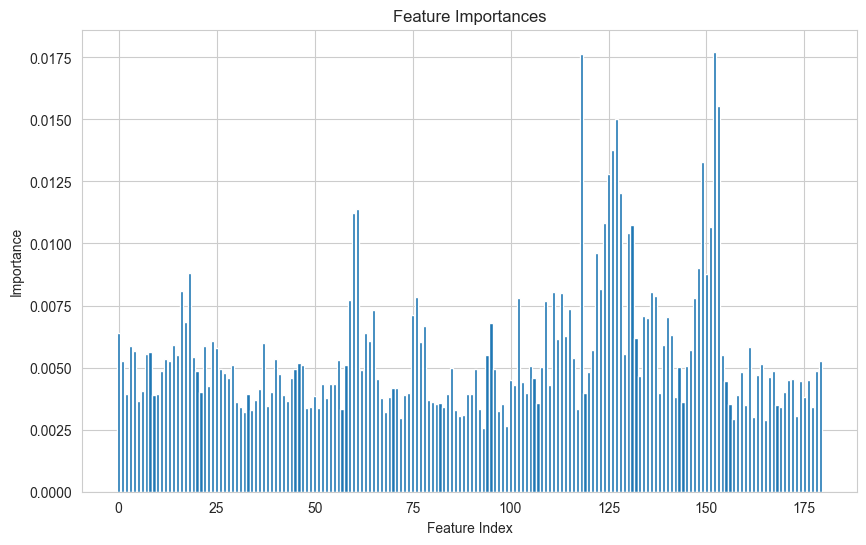

In [38]:
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(xtrn.shape[1]), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()